In [1]:
import os
os.chdir("../../analyses_data/sensitivity_tests/Spectronaut_LargeFC/")

In [2]:
import os

input_file = "20210210_154121_S209-S-1-240min_Reportv2.tsv"
samplemap_file = "samples.map.tsv"
results_dir = "results"
results_dir_housekeeping_protnormed = "results_houskeeping_protnormed"
results_dir_no_norm = "results_nonorm"
protein_subset_for_normalization_file="human_proteins.tsv"

spectronaut_file = "MP-LFC-OT.xlsx"
alphaquant_file = "./results_houskeeping_protnormed/S1_VS_S2.results.tsv"
mapping_file = "20210210_154121_S209-S-1-240min_Report.annotation.tsv" #"20210210_154121_S209-S-1-240min_Report.tsv"


run_diffanalysis = False

run_diffanalysis_nonorm = False

run_diffanalysis_housekeeping_protnormed = True

print(os.path.abspath("."))

housekeeping_genes = "housekeeping_genes.tsv"
housekeeping_proteins = "housekeeping_proteins.tsv"


/Users/constantin/workspace/alphaquant/analyses_data/sensitivity_tests/Spectronaut_LargeFC


In [3]:
if run_diffanalysis:
    import alphaquant.diff_analysis_manager as diffmgr

    diffmgr.run_pipeline(input_file=input_file, samplemap_file=samplemap_file, results_dir=results_dir, runtime_plots=True)

2024-02-27 18:03:15,175 - alphaquant.run_pipeline - INFO - Starting AlphaQuant


using input type spectronaut_fragion_isotopes_protein


2024-02-27 18:07:15,939 - alphaquant.diffquant.diffutils - INFO - removed pre existing /Users/constantin/workspace/alphaquant/analyses_data/sensitivity_tests/Spectronaut_LargeFC/20210210_154121_S209-S-1-240min_Reportv2.tsv.ml_info_table.tsv
2024-02-27 18:09:40,498 - alphaquant.diffquant.condpair_analysis - INFO - start processeing condpair ('S1', 'S2')
2024-02-27 18:09:45,138 - alphaquant.norm.normalization - INFO - normalized within conditions
2024-02-27 18:09:45,139 - alphaquant.plotting.pairwise - INFO - without missingvals (if applicable)
2024-02-27 18:09:46,880 - alphaquant.plotting.pairwise - INFO - complete dataset
2024-02-27 18:09:50,308 - alphaquant.norm.normalization - INFO - shift comparison by -0.12376974800960028
2024-02-27 18:09:53,394 - alphaquant.norm.normalization - INFO - normalized between conditions
2024-02-27 18:11:12,560 - alphaquant.diffquant.condpair_analysis - INFO - checked 0 of 1166655 ions
2024-02-27 18:11:12,866 - alphaquant.diffquant.condpair_analysis - IN

8626


2024-02-27 18:20:14,273 - alphaquant.classify.classify_ions - INFO - performed RF prediction


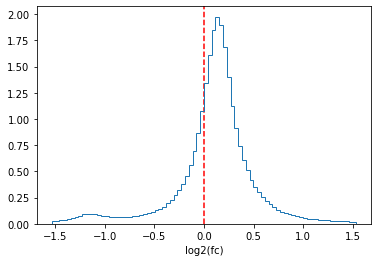

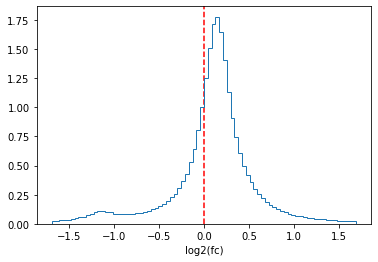

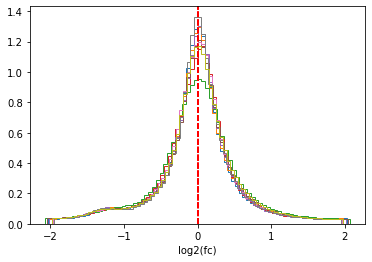

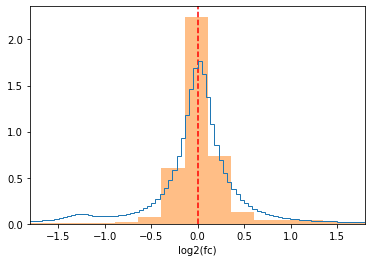

/Users/constantin/workspace/alphaquant/alphaquant/plotting/base_functions.py:1300: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_perturb.show()


0.99 of fcs retained of 8832 total


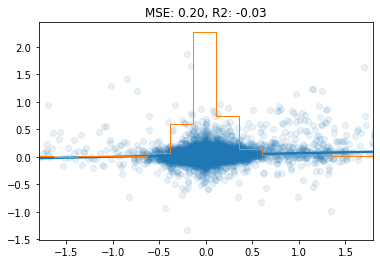

0.01 of fcs retained of 107 total


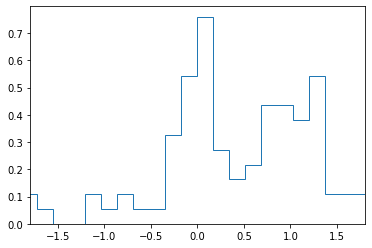

0.1205317704146593	ms1_ms2_fcfc_diff
0.10840815568790944	child_type_frgion_num_elems_secondclust
0.08676902531963608	min_intensity
0.07880583770818977	child_type_frgion_cv_fcs
0.0775398833865582	child_type_ms1_isotopes_num_elems_secondclust
0.06904766507780889	child_type_ms1_isotopes_replicate_cv
0.06825961800114072	child_type_ms1_isotopes_cv_fcs
0.06277338769070502	child_type_frgion_betweenclust_fcfc
0.05979919903338802	child_type_frgion_replicate_cv
0.05649328427978673	cv


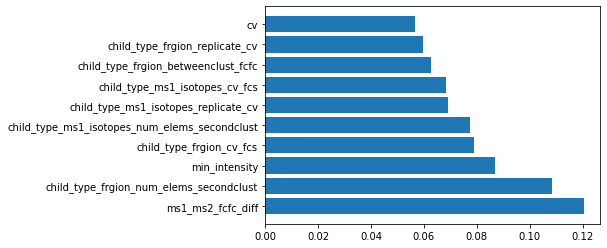

2024-02-27 18:20:17,236 - alphaquant.classify.classify_ions - INFO - subrange: 0.3754334936793825
2024-02-27 18:22:21,630 - alphaquant.diffquant.condpair_analysis - INFO - condition pair ('S1', 'S2') finished!


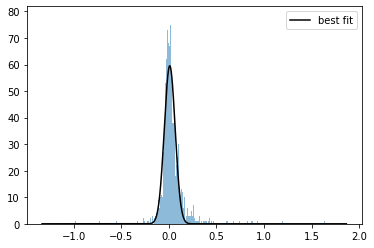

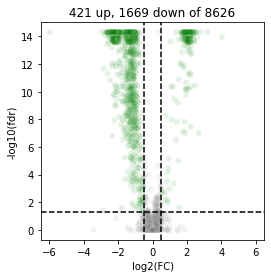

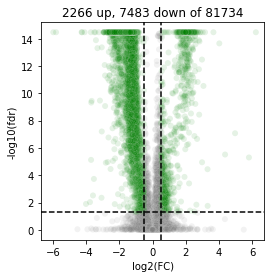

In [4]:
if run_diffanalysis_housekeeping_protnormed:
    import alphaquant.run_pipeline as run_pipeline

    run_pipeline.run_pipeline(input_file=input_file, samplemap_file=samplemap_file, results_dir=results_dir_housekeeping_protnormed, runtime_plots=True, protein_subset_for_normalization_file=housekeeping_proteins, 
                              write_out_results_tree=True, annotation_columns=["PG.Organisms"], input_type_to_use="spectronaut_fragion_isotopes_protein")

In [5]:
if run_diffanalysis_nonorm:
    import alphaquant.diff_analysis_manager as diffmgr
    print(os.path.abspath("."))
    diffmgr.run_pipeline(input_file=input_file, samplemap_file=samplemap_file, results_dir=results_dir_no_norm, runtime_plots=True, normalize=True, use_iontree_if_possible=False)

In [17]:
import pandas as pd
annotation_file = "20210210_154121_S209-S-1-240min_Reportv2.annotation.tsv"
annoation_df = pd.read_csv(annotation_file, sep='\t').rename(columns={"PG.Organisms": "organism"})
df_alphaquant = pd.read_csv(alphaquant_file, sep='\t')[["protein", "log2fc", "fdr", "quality_score", "total_intensity"]].merge(annoation_df, on="protein", how="inner")
#df_alphaquant = pd.read_csv(alphaquant_file, sep='\t')[["protein", "log2fc", "fdr", "quality_score", "PG.Organisms", "total_intensity"]].rename(columns={"PG.Organisms": "organism"})
display(df_alphaquant)

df_spectronaut = pd.read_excel(spectronaut_file, sheet_name=2)[["Protein", "log2FC", "adjusted.pvalue"]].rename(columns={"Protein" : "protein", "log2FC" : "log2fc", "adjusted.pvalue" : "fdr"})

df_combined = df_alphaquant.merge(df_spectronaut, on="protein", how="inner", suffixes=("_alphaquant", "_spectronaut"))
df_combined["intensity_alphaquant"] = df_combined["total_intensity"]
df_combined["intensity_spectronaut"] = df_combined["total_intensity"]
df_combined = df_combined.drop(columns=["total_intensity"])

display(df_combined)

,protein,log2fc,fdr,quality_score,total_intensity,organism
0,P33992,0.004438,9.991488e-01,0.093716,1.972306e+08,Homo sapiens
1,Q9BQ52,0.025659,8.546529e-01,0.084527,7.787554e+07,Homo sapiens
2,P60709,-0.072614,8.993730e-01,0.312015,1.089469e+10,Homo sapiens
3,O75475,0.065937,9.991488e-01,0.068876,1.499538e+08,Homo sapiens
4,P40227,0.013447,9.991488e-01,0.161797,7.078126e+08,Homo sapiens
...,...,...,...,...,...,...
8621,Q08926,-1.615133,2.247330e-04,0.000816,4.328823e+06,Saccharomyces cerevisiae (strain ATCC 204508 /...
8622,P07244,-0.450796,7.866757e-03,0.001550,3.861118e+06,Saccharomyces cerevisiae (strain ATCC 204508 /...
8623,P0A6P5,-2.747724,5.038603e-15,0.001407,2.442603e+05,Escherichia coli (strain K12)
8624,P49029,-1.429125,1.225217e-11,0.001599,9.465886e+05,Caenorhabditis elegans


,protein,log2fc_alphaquant,fdr_alphaquant,quality_score,organism,log2fc_spectronaut,fdr_spectronaut,intensity_alphaquant,intensity_spectronaut
0,P33992,0.004438,9.991488e-01,0.093716,Homo sapiens,0.074355,0.171529,1.972306e+08,1.972306e+08
1,Q9BQ52,0.025659,8.546529e-01,0.084527,Homo sapiens,0.049064,0.172471,7.787554e+07,7.787554e+07
2,P60709,-0.072614,8.993730e-01,0.312015,Homo sapiens,-0.034190,0.331930,1.089469e+10,1.089469e+10
3,O75475,0.065937,9.991488e-01,0.068876,Homo sapiens,0.055664,0.371884,1.499538e+08,1.499538e+08
4,P40227,0.013447,9.991488e-01,0.161797,Homo sapiens,0.086091,0.172849,7.078126e+08,7.078126e+08
...,...,...,...,...,...,...,...,...,...
7848,Q09312;Q9N5M6,-1.187113,3.095890e-05,0.000653,Caenorhabditis elegans,-1.512793,0.001656,9.783793e+04,9.783793e+04
7849,Q9UJU6-2,0.262483,4.970812e-01,0.001631,Homo sapiens,0.088249,0.381491,4.992859e+05,4.992859e+05
7850,O61522,-1.207957,5.631793e-11,0.001305,Caenorhabditis elegans,-1.666064,0.003993,9.930236e+05,9.930236e+05
7851,P07244,-0.450796,7.866757e-03,0.001550,Saccharomyces cerevisiae (strain ATCC 204508 /...,-0.356607,0.073793,3.861118e+06,3.861118e+06


,organism,hits_alphaquant,max_hits_alphaquant,allowed_decoy_hits_alphaquant,hits_spectronaut,max_hits_spectronaut,allowed_decoy_hits_spectronaut
0,Caenorhabditis elegans,925,1001,NaN,909,1001,NaN
1,Escherichia coli (strain K12),369,389,NaN,370,389,NaN
2,Homo sapiens,56,0,89.0,191,0,96.0
3,Saccharomyces cerevisiae (strain ATCC 204508 /...,355,389,NaN,356,389,NaN


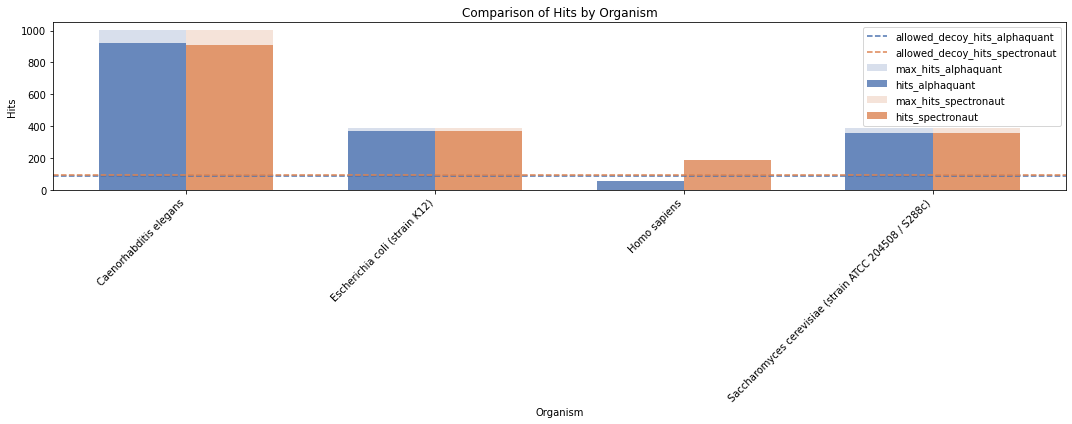

In [18]:
import alphaquant.benchm.sensitivity as aq_benchm_sensititivy
classification_benchmark = aq_benchm_sensititivy.RatioClassificationTableGenerator(df_combined, decoy_organism="Homo sapiens")
classification_df = classification_benchmark.per_species_results_df
display(classification_df)
ax = aq_benchm_sensititivy.plot_sighits_barplot(classification_benchmark.per_species_results_df, ['_alphaquant', '_spectronaut'], 'Homo sapiens')



In [19]:
def assert_fdr_is_not_violated(classification_df, suffix = "_alphaquant",  decoy_organism="Homo sapiens"):
    idx_of_decoy_organism = classification_df[classification_df["organism"] == decoy_organism].index
    num_allowed_hits = classification_df.loc[idx_of_decoy_organism, f"allowed_decoy_hits{suffix}"].values[0]
    num_allowed_hits_w_tolerance = int(1.1*num_allowed_hits)
    num_actual_hits =  classification_df.loc[idx_of_decoy_organism,f"hits{suffix}"].values[0]

    assert num_actual_hits < num_allowed_hits_w_tolerance , "more false postives than expected"


def assert_sensitivity_is_as_expected(classification_df, suffix = "_alphaquant",  decoy_organism="Homo sapiens"):
    idx_of_organisms_of_interest = classification_df[classification_df["organism"] != decoy_organism].index
    for idx_elem in idx_of_organisms_of_interest:
        max_num_hits = classification_df.loc[idx_elem, f"max_hits{suffix}"]
        actual_hits =  classification_df.loc[idx_elem, f"hits{suffix}"]

        assert actual_hits*1.15 > max_num_hits, "sensitivity lower than expected"


assert_fdr_is_not_violated(classification_df)
assert_sensitivity_is_as_expected(classification_df)

In [20]:
%reload_ext autoreload
%autoreload 2

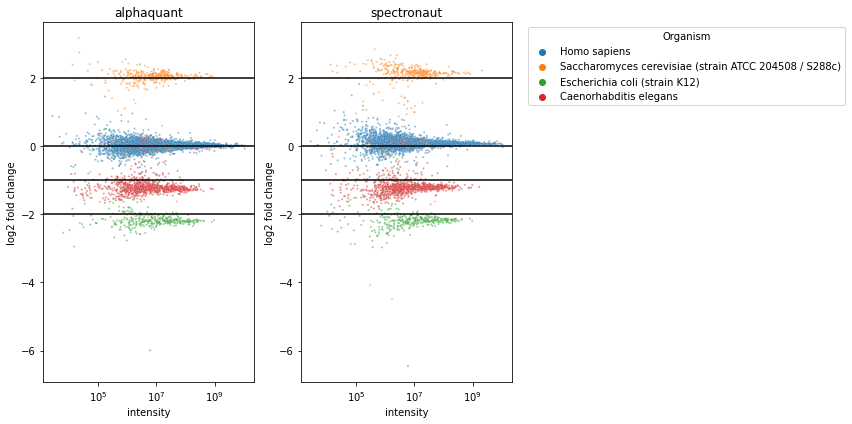

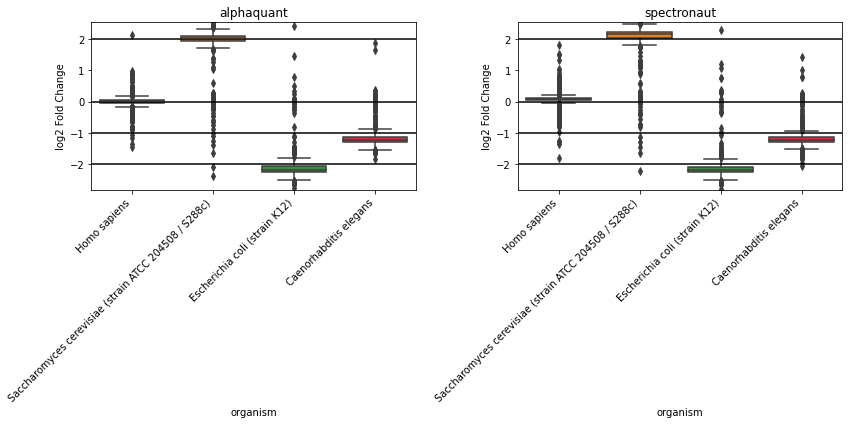

In [21]:
import alphaquant.benchm.ratios as aq_benchm_ratios

scatter_plotter = aq_benchm_ratios.MixedSpeciesScatterPlotter(df_combined=df_combined, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])
aq_benchm_ratios.MixedSpeciesBoxPlotter(df_combined=df_combined, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])




7853

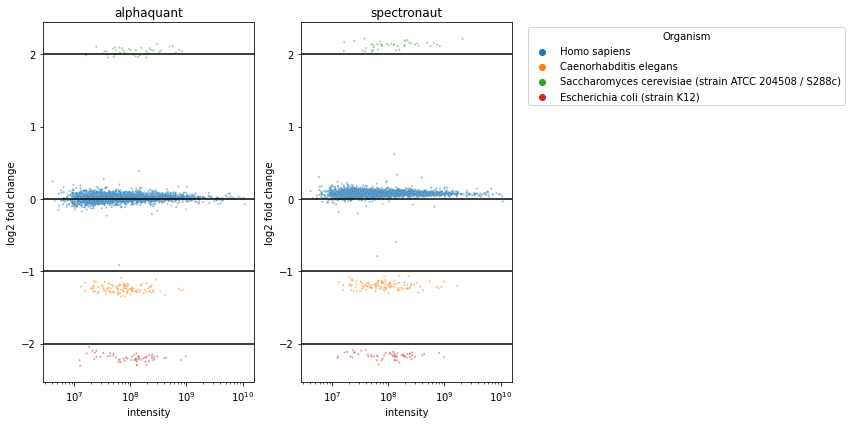

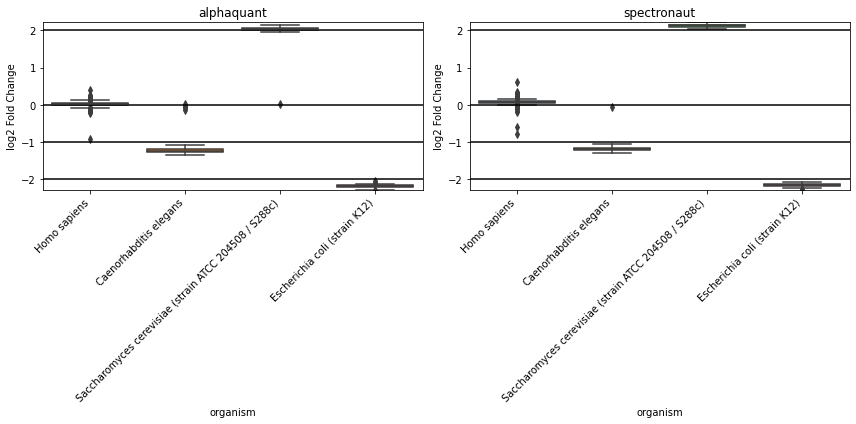

In [22]:
import alphaquant.benchm.ratios as aq_benchm_ratios

display(len(df_combined.index))
df_combined_shortened = df_combined.sort_values(by= "quality_score", ascending=False).head(3000)

scatter_plotter = aq_benchm_ratios.MixedSpeciesScatterPlotter(df_combined=df_combined_shortened, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])
aq_benchm_ratios.MixedSpeciesBoxPlotter(df_combined=df_combined_shortened, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])




In [12]:
import plotly.express as px
import pandas as pd

class MixedSpeciesScatterPlotterInteractive:
    """
    Plots interactive LFQ-bench style plots from a standardized input table using plotly for interactivity.
    Hovering over points will display protein names among other details.
    """
    def __init__(self, df_combined, method_suffixes, expected_log2fcs):
        self._df_combined = df_combined
        self._method_suffixes = method_suffixes
        self._expected_log2fcs = expected_log2fcs
        self.figures = []

        self._plot_fc_scatter_per_method()

    def _plot_fc_scatter_per_method(self):
        for method_idx, suffix in enumerate(self._method_suffixes):
            self._plot_fc_scatter(method_idx, suffix)

    def _plot_fc_scatter(self, method_idx, suffix):
        intensity_column = f'intensity{suffix}'
        log2fc_column = f'log2fc{suffix}'
        organism_column = 'organism'
        protein_column = 'protein'

        fig = px.scatter(self._df_combined, x=intensity_column, y=log2fc_column, color=organism_column,
                          hover_data=[protein_column], log_x=True, title=suffix[1:],
                          labels={"x": "Intensity", "y": "Log2 Fold Change"},
                          opacity=0.5, size_max=60)

        # Add expected_log2fc lines
        for expected_log2fc in self._expected_log2fcs:
            fig.add_hline(y=expected_log2fc, line_dash="dash", line_color="black")

        self.figures.append(fig)
        print("scatter plotted")

    def show_figures(self):
        for fig in self.figures:
            fig.show()


scatter_plotter_interactive = MixedSpeciesScatterPlotterInteractive(df_combined=df_combined, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2])
scatter_plotter_interactive.show_figures()

scatter plotted
scatter plotted


In [13]:
df_combined["fcdiff"] = abs(df_combined["log2fc_alphaquant"] - df_combined["log2fc_spectronaut"])
df_combined = df_combined.sort_values(by="fcdiff", ascending=False)
display(df_combined.head(100))

df_combined.to_csv("/tmp/combined.tsv", sep='\t', index=False)


,protein,log2fc_alphaquant,fdr_alphaquant,quality_score,organism,log2fc_spectronaut,fdr_spectronaut,intensity_alphaquant,intensity_spectronaut,fcdiff
5121,P14020,2.007893,5.038603e-15,0.003120,Saccharomyces cerevisiae (strain ATCC 204508 /...,-4.487363,0.000926,1.701662e+06,1.701662e+06,6.495255
4143,P17255,-0.473618,4.912759e-06,0.002704,Saccharomyces cerevisiae (strain ATCC 204508 /...,2.075561,0.000323,2.600107e+06,2.600107e+06,2.549179
6868,P16547,2.054213,5.679782e-15,0.003834,Saccharomyces cerevisiae (strain ATCC 204508 /...,-0.436231,0.280315,3.010210e+06,3.010210e+06,2.490443
5482,P02992,0.102594,1.958178e-01,0.006321,Saccharomyces cerevisiae (strain ATCC 204508 /...,2.327680,0.001032,1.550122e+08,1.550122e+08,2.225085
5656,P09424,0.050581,9.991488e-01,0.001550,Escherichia coli (strain K12),-2.160160,0.000239,5.847616e+06,5.847616e+06,2.210740
...,...,...,...,...,...,...,...,...,...,...
5162,P0A6R0,-2.272218,1.515301e-14,0.002577,Escherichia coli (strain K12),-1.553828,0.009265,2.727429e+06,2.727429e+06,0.718390
7077,P0DI81;P0DI81-3;P0DI82,-0.320396,4.497291e-01,0.001672,Homo sapiens,0.397429,0.205420,2.933141e+05,2.933141e+05,0.717824
6918,P17117,-2.156867,5.038603e-15,0.000938,Escherichia coli (strain K12),-2.871056,0.000193,6.425356e+04,6.425356e+04,0.714188
5062,Q9Y2F5,-0.222771,9.991488e-01,0.005633,Homo sapiens,0.489780,0.090635,6.782164e+06,6.782164e+06,0.712551


In [14]:
import alphaquant.plotting.fcviz as aq_fcviz
import alphaquant.plotting.tree_and_fc_viz as aq_tree_and_fc_viz
import alphaquant.plotting.base_functions as aq_base_functions
import alphaquant.utils.utils as aq_utils



quantification_info = aq_fcviz.CondpairQuantificationInfo(("S1", "S2"), results_dir_housekeeping_protnormed, samplemap_file)

#load the trees containing the tree-based quantification info
condpair_tree = aq_utils.read_condpair_tree("S1", "S2", results_folder=results_dir_housekeeping_protnormed)


2024-02-27 18:23:22,049 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-02-27 18:23:22,055 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-02-27 18:23:22,098 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-02-27 18:23:22,103 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-02-27 18:23:22,

2.074559076938436
2.074559076938436
1.9812209855751504
1.9722414444665448
2.14702239777872
2.237658271447265
1.695196059403111
2.074559076938436
2.212407423141782


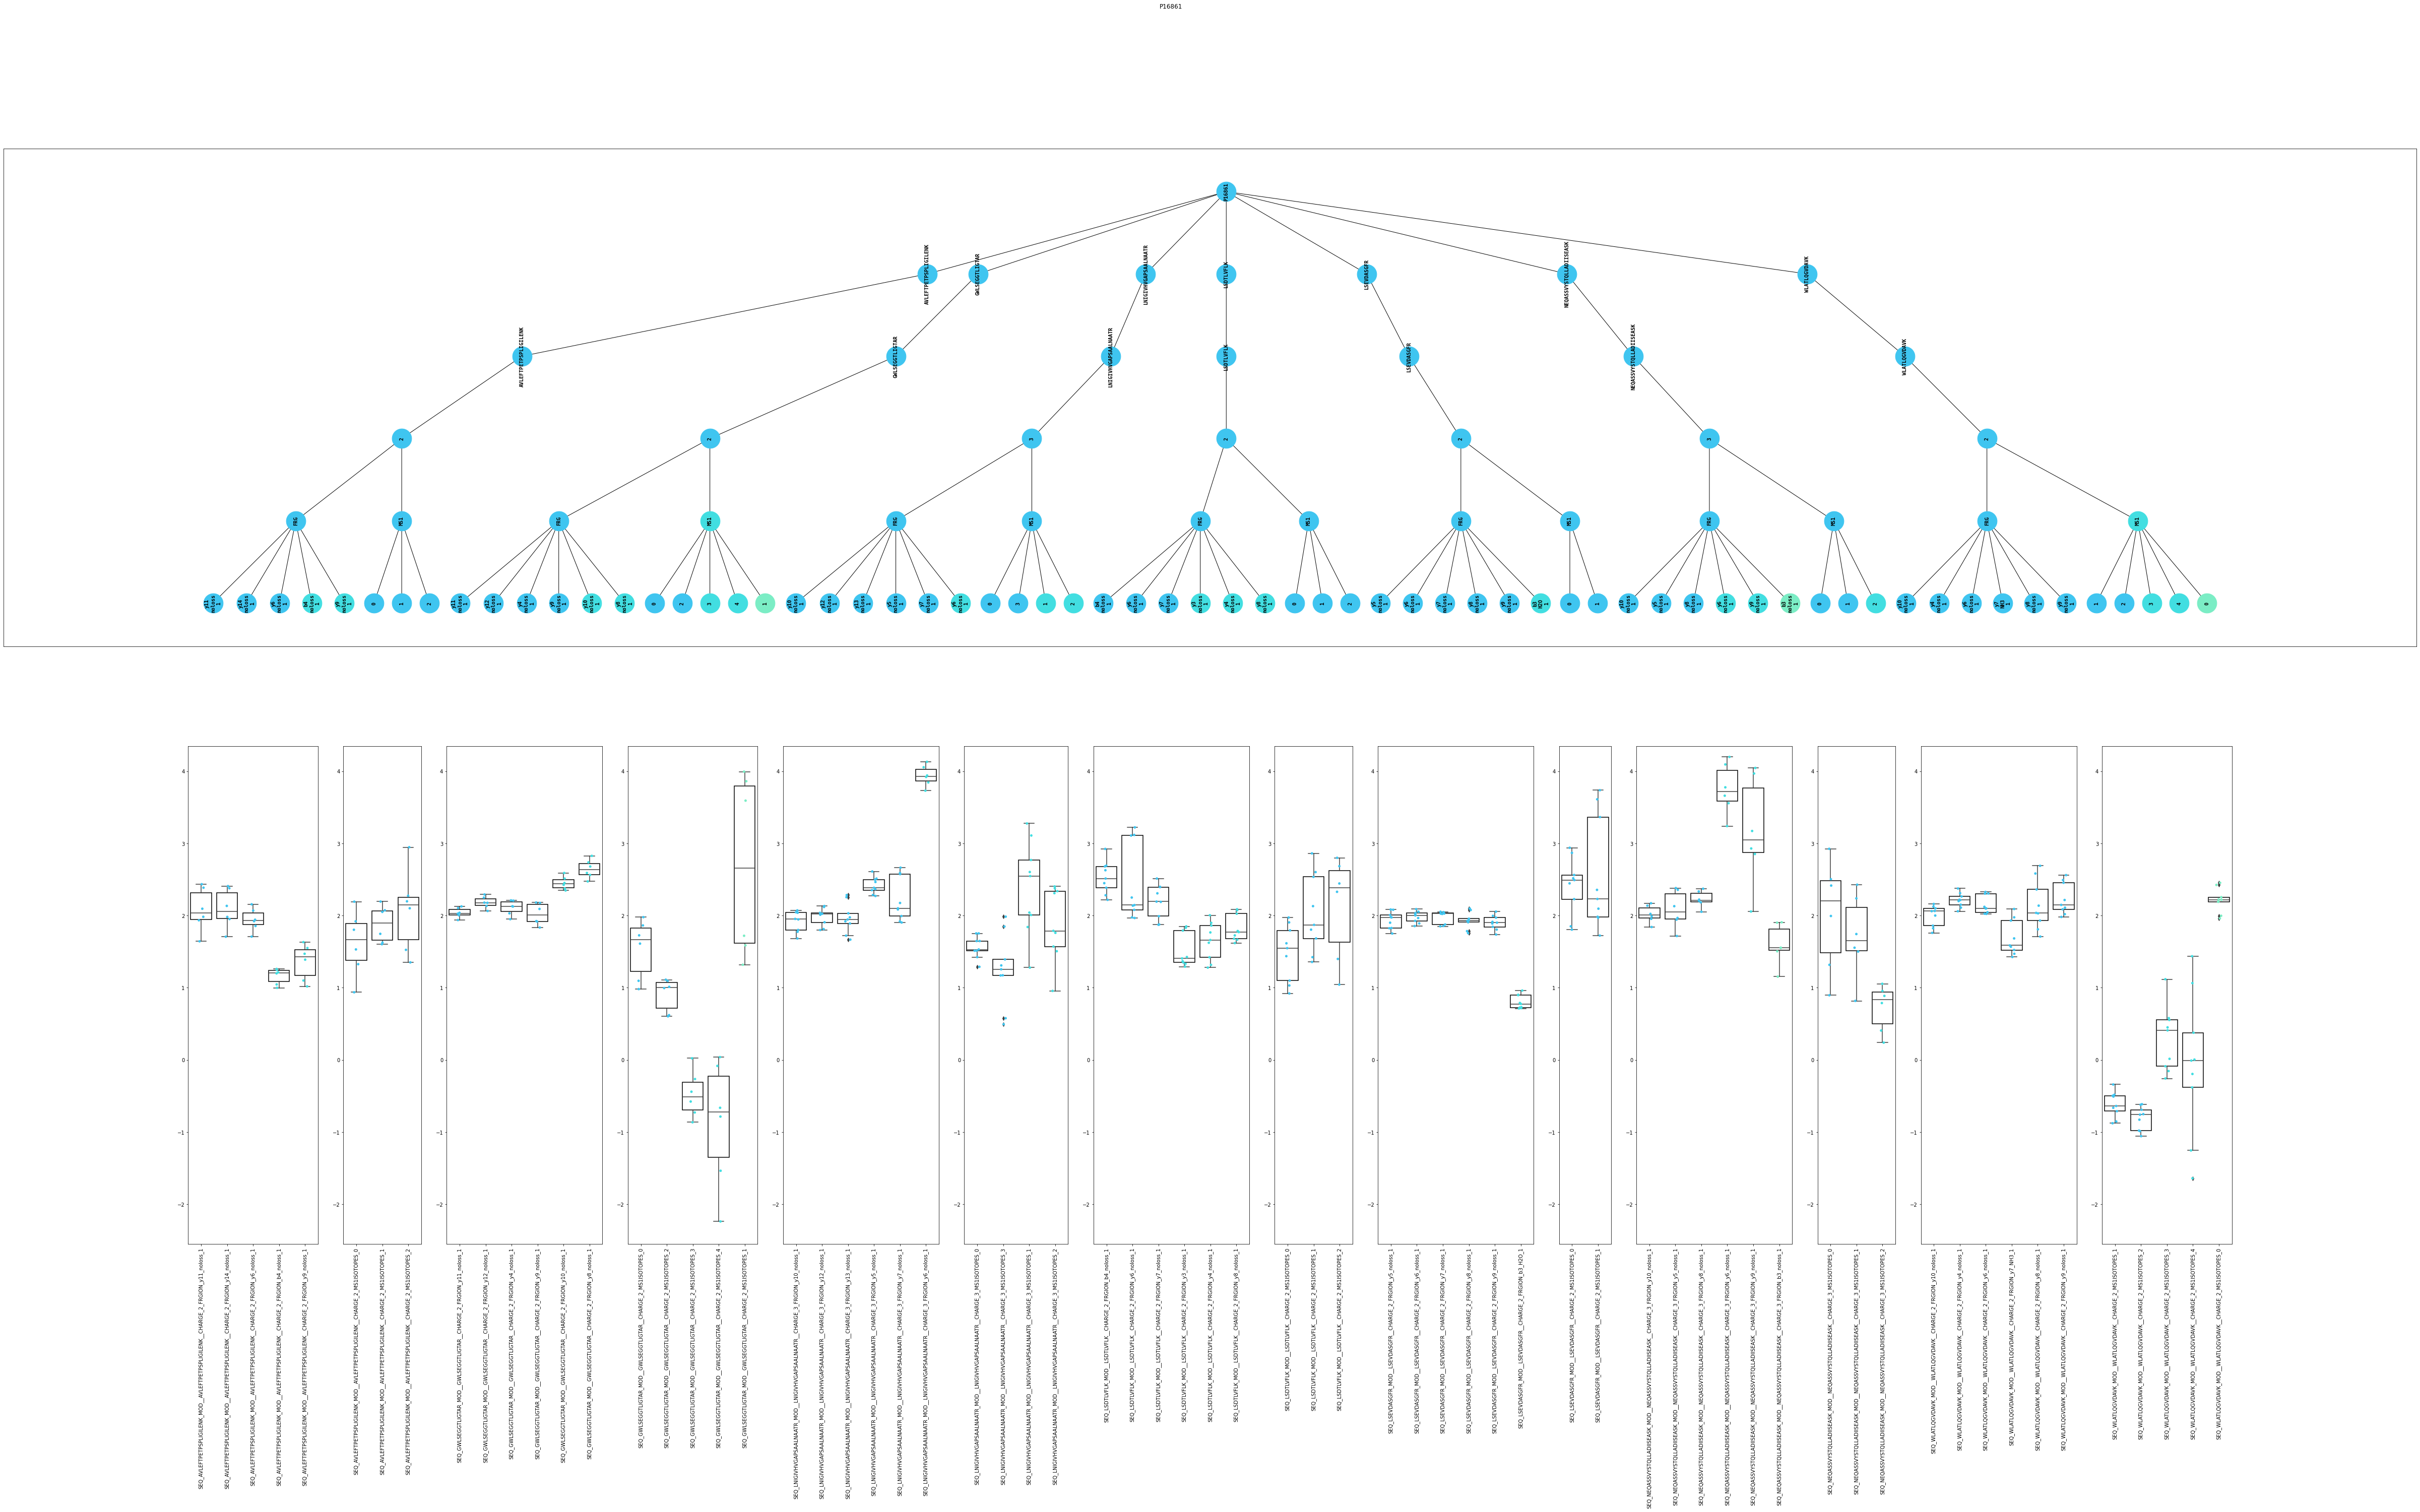

In [15]:
import numpy as np
plotconfig = aq_fcviz.PlotConfig()
plotconfig.colorlist = aq_base_functions.AlphaPeptColorMap().colorlist #change the colorlist to the AlphaPept colorlist, not necessary
plotconfig.parent_level = "gene"
plotconfig.parent_level = "mod_seq_charge"
plotconfig.parent_level = "ion_type"
plotconfig.add_stripplot = True
protein2node = {x.name : x for x in condpair_tree.children}

protein_node = protein2node["P16861"]

combined_plotter = aq_tree_and_fc_viz.CombinedTreeAndFCPlotter(protein_node, quantification_info, plotconfig)
    
print(protein_node.fc)
print(np.median([x.fc for x in protein_node.children]))
for child in  protein_node.children:
    print(child.fc)

In [16]:
import pandas as pd
import alphaquant.visualizations as aqplot

results_df_aq = pd.read_csv(alphaquant_file, sep = "\t")
results_df_sn = pd.read_excel(spectronaut_file, sheet_name=2)

aqplot.volcano_plot(results_df_aq,log2fc_cutoff=0)
aqplot.volcano_plot(results_df_sn, log2fc_cutoff=0, fdr_header="adjusted.pvalue", fc_header="log2FC", ybound=(0,16))

ModuleNotFoundError: No module named 'alphaquant.visualizations'

In [ ]:
import pandas as pd
proteoform_df = pd.read_csv("./results_houskeeping_protnormed/S1_VS_S2.proteoforms.tsv", sep='\t')
display(proteoform_df)
quality_scores = proteoform_df["quality_score"].to_list()
num_reference_pforms = sum(proteoform_df["is_reference"])
num_all = len(proteoform_df.index)

print((num_all-num_reference_pforms)/num_reference_pforms)

,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,fcdiff
0,A0A061ACL3;O76618;Q965I6,A0A061ACL3;O76618;Q965I6_0,0,True,SEQ_VSEYVPEVITYVK_;SEQ_SYLSLDILR_;SEQ_ITNEFFLL...,6,0.016340,-1.382535,1.0,0.0
1,A0A061ACM2;A0A061ACP8;A0A061ADW6;A0A061AJ42;G5...,A0A061ACM2;A0A061ACP8;A0A061ADW6;A0A061AJ42;G5...,0,True,SEQ_LSFNLLAK_,1,0.012626,-1.489337,1.0,0.0
2,A0A061ACR1;F5GUA3;Q22498;Q2XN02,A0A061ACR1;F5GUA3;Q22498;Q2XN02_0,0,True,SEQ_AIVETIIAIIEENPDAK_;SEQ_VVPVTQQALSQPEK_,2,0.014483,-0.932322,1.0,0.0
3,A0A061AD21;A0A061AJI9;C1P640;C1P641;G5EEV6;Q21313,A0A061AD21;A0A061AJI9;C1P640;C1P641;G5EEV6;Q21...,0,True,SEQ_HADDSNPDASFLSAFFGK_;SEQ_LAPVIVSK_;SEQ_ATFA...,5,0.014483,-1.207246,1.0,0.0
4,A0A061AD41;O45228,A0A061AD41;O45228_0,0,True,SEQ_TLDVAEYAIEK_,1,0.010151,-0.921505,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8944,Q9Y6X5,Q9Y6X5_0,0,True,SEQ_KIDDLIGDLVQR_;SEQ_NYEFPHLQNFIK_;SEQ_LLLVSF...,3,0.016340,0.066928,1.0,0.0
8945,Q9Y6X9;Q9Y6X9-2,Q9Y6X9;Q9Y6X9-2_0,0,True,SEQ_TNIVALLQK_;SEQ_DIQMAETSPEGTKPER_;SEQ_LLQPP...,13,0.016340,0.011989,1.0,0.0
8946,Q9Y6Y0,Q9Y6Y0_0,0,True,SEQ_LYIVGGSDPYGQK_;SEQ_VINWVQR_,2,0.014483,0.128119,1.0,0.0
8947,Q9Y6Y8,Q9Y6Y8_0,0,True,SEQ_AHTSSTQLQEELEK_;SEQ_VANQIKEEEEK_;SEQ_EMGIP...,25,0.034908,-0.014218,1.0,0.0


0.037444933920704845


In [ ]:
import alphaquant.utils.diffquant_utils as aq_diffquant_utils

proteoform_df_filtered = aq_diffquant_utils.filter_proteoform_df(proteoform_df=proteoform_df, min_num_peptides=1, fcdiff_cutoff=0)
quality_scores_filtered = proteoform_df_filtered["quality_score"].to_list()

display(proteoform_df_filtered)

proteins_of_interest = set(proteoform_df_filtered["protein"])


,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,fcdiff
33,A2RTX5,A2RTX5_1,1,False,SEQ_FADFGVLHR_;SEQ_EILLEMFK_,2,0.031295,-1.158079,0.25,1.181328
35,A3KMH1;A3KMH1-3,A3KMH1;A3KMH1-3_1,1,False,SEQ_LILPSEK_,1,0.001677,3.021547,0.04,3.024507
95,D0PV95,D0PV95_1,1,False,SEQ_GLDIPNVK_,1,0.008941,-0.479897,0.14,0.847896
107,E0AHA7;G5EG85;Q9U9J8;S6FN00,E0AHA7;G5EG85;Q9U9J8;S6FN00_1,1,False,SEQ_LIADINR_,1,0.010804,3.296671,0.33,4.583933
119,G4S034;Q21408,G4S034;Q21408_1,1,False,SEQ_DLIGVQNLIK_,1,0.016393,0.022381,0.14,1.337973
...,...,...,...,...,...,...,...,...,...,...
8816,Q9Y4E5;Q9Y4E5-2,Q9Y4E5;Q9Y4E5-2_0,0,True,SEQ_NAGPVAVAEK_;SEQ_GIAHPISFPSFAK_;SEQ_LCVDQWL...,4,0.016393,-0.154925,0.80,0.000000
8847,Q9Y5A7;Q9Y5A7-2,Q9Y5A7;Q9Y5A7-2_0,0,True,SEQ_TLEEQGVAHNVK_;SEQ_VDNLLQLGFTAQEAR_;SEQ_ACD...,6,0.027453,0.027943,0.86,0.000000
8853,Q9Y5B9,Q9Y5B9_0,0,True,SEQ_EDGELNLMK_;SEQ_MQGSLEAHVNGFR_;SEQ_NEMTAEEK...,64,0.103945,0.056496,0.98,0.000000
8868,Q9Y5P6;Q9Y5P6-2,Q9Y5P6;Q9Y5P6-2_0,0,True,SEQ_IGQNCSIGPNVSLGPGVVVEDGVCIR_;SEQ_SHSWLESCIV...,10,0.027570,0.060132,0.91,0.000000


no normed peptides found for spleen_VS_testis!
no quantfiles found for spleen_VS_testis!


AttributeError: 'NoneType' object has no attribute 'set_index'